# Obtain data for Patient 1 and Patient 2
The `patients` variable below is an array of dictionaries. Each dictionary has the following fields: 
 - `parent` (`str`): The parent directory where the patient's various test types can be found, e.g. C:\\Devevelopment\\Parkinson's Project\\Parkinson-Disease-Repository\\Data\\Patient001-2019-12-05
 - `patient`: (`str`): The name of the folder of the patient, taken to be the code representing the patient
 - `contents` (`str[]`): An array of the of the patient's tests. 

In [1]:
import os

patients_folder = os.getcwd()
patients = os.listdir(patients_folder)

patients = list(filter(lambda x: 'patient' in x.lower(), patients))
patients = list(map(lambda x: patients_folder + '\\' + x, patients))

patients = list(map(lambda x: {
    'parent': x,
    'patient': x.split('\\')[-1],
    'contents': os.listdir(x)
}, patients))

patients

[{'parent': "D:\\Dev\\FYP Parkinson's\\Parkinson-Disease-Repository\\Testground\\Test 8 - Ka Shing_Data Analysis\\Patient001-2019-12-05",
  'patient': 'Patient001-2019-12-05',
  'contents': ['ftap-forearm',
   'ftap-wrist',
   'hmove-forearm',
   'hmove-wrist',
   'leag-calf&heel',
   'leag-heel',
   'prosup-forearm',
   'prosup-wrist',
   'tota-calf&heel',
   'tota-heel',
   'ttap-forearm',
   'ttap-wrist',
   'tugt-heel',
   'tugt-waist']},
 {'parent': "D:\\Dev\\FYP Parkinson's\\Parkinson-Disease-Repository\\Testground\\Test 8 - Ka Shing_Data Analysis\\Patient002",
  'patient': 'Patient002',
  'contents': ['AR_test.xlsx',
   'ftap-forearm',
   'ftap-wrist',
   'hmove-forearm',
   'hmove-wrist',
   'tota-calf&heel',
   'tota-heel']}]

We designate constants to access Patient 1 and Patient 2 in the above array.

In [2]:
PATIENT1 = 0
PATIENT2 = 1

We first look at Patient 1's `ftap-forearm`.  

In [3]:
FTAP_FOREARM = 0

In [4]:
patient_1_ftap_forearm_tests = os.listdir(patients[PATIENT1]['parent'] + '\\' + patients[PATIENT1 ]['contents'][FTAP_FOREARM])
patient_1_ftap_forearm_tests

['ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv',
 'ftap-lvl1-forearm_S2_2019-12-10T14.18.34.621_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-lvl1-forearm_S2_2019-12-10T14.18.34.621_C49948A1895C_Gyroscope_1.4.5.csv',
 'ftap-lvl2-forearm _S2_2019-12-18T11.44.32.751_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-lvl2-forearm _S2_2019-12-18T11.44.32.751_C49948A1895C_Gyroscope_1.4.5.csv',
 'ftap-lvl3-forearm_S2_2019-12-18T11.51.23.290_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-lvl3-forearm_S2_2019-12-18T11.51.23.290_C49948A1895C_Gyroscope_1.4.5.csv',
 'ftap-lvl4-forearm_S2_2019-12-18T11.57.37.574_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-lvl4-forearm_S2_2019-12-18T11.57.37.574_C49948A1895C_Gyroscope_1.4.5.csv']

Isolate `lvl0`.

In [5]:
patient_1_ftap_forearm_tests_lvl0 = list(filter(lambda x: 'lvl0' in x, patient_1_ftap_forearm_tests))
patient_1_ftap_forearm_tests_lvl0

['ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv']

Plot `lvl0` accelerometer and gyroscope sensor data.

In [6]:
import pandas as pd

def read_csv(path):
    """
    Reads the .csv file at the given path into a dataframe.
    
    Parameters
    ----------
    path (str)
        The path at which the CSV file can be found.
        
    Raises
    ------
    FileNotFoundError:
        The path is either wrong or the file does not exist. 
    """
    try:
        return pd.read_csv(path)
    except FileNotFoundError as e:
        # The path is either wrong or the file does not exist. 
        raise e
    
    
accel_df = read_csv(patients[PATIENT1]['parent'] + '\\' + patients[PATIENT1]['contents'][FTAP_FOREARM] + '\\' + patient_1_ftap_forearm_tests_lvl0[0])
accel_df

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1575539732037,2019-12-05T09:55:32.037,0.000,0.478,0.141,0.830
1,1575539732056,2019-12-05T09:55:32.056,0.019,0.480,0.140,0.833
2,1575539732077,2019-12-05T09:55:32.077,0.040,0.481,0.139,0.827
3,1575539732096,2019-12-05T09:55:32.096,0.059,0.481,0.142,0.828
4,1575539732116,2019-12-05T09:55:32.116,0.079,0.478,0.142,0.829
...,...,...,...,...,...,...
4903,1575539829479,2019-12-05T09:57:09.479,97.442,0.425,0.219,0.845
4904,1575539829498,2019-12-05T09:57:09.498,97.461,0.425,0.210,0.849
4905,1575539829518,2019-12-05T09:57:09.518,97.481,0.425,0.209,0.850
4906,1575539829537,2019-12-05T09:57:09.537,97.500,0.425,0.213,0.847


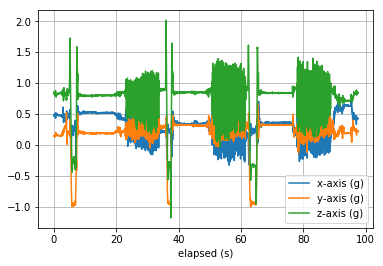

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline

BIGFIG = (15, 10)
SMALLFIG = (6, 4)


def plot(dataframe, x, y, ax=None, figsize=BIGFIG):
    """
    Plots the values from the given dataframe using the given x- and y-columns.
    
    Parameters
    ----------
    dataframe (DataFrame())
        The dataframe containing the values to be plotted.
    x (int/str)
        The index of the column to be used as the x-axis.
    y (int[]/str[])
        An array of indices of the column(s) to be used as the y-axis. 
    """
    dataframe.plot(x=x, y=y, ax=ax, figsize=figsize, grid=True)
    
    plt.show()
    
    
plot(accel_df, 2, [3, 4, 5], figsize=SMALLFIG)

We want to truncate this into three separate tests. Truncation is obtained from `Test 3 - Chin Yang's Playground/MyVisuals.ipynb`. The values are as follows: `22.7, 34, 50.4, 62, 78, 89`

In [29]:
splits = (
    (22.7, 34),
    (50.4, 62),
    (78, 89)
)

accel_df_array = [accel_df.loc[accel_df.iloc[:, 2].between(t[0], t[1]), :].reset_index(drop=True) for t in splits]
accel_df_array

[        epoch (ms)            time (-00:00)  elapsed (s)  x-axis (g)  \
 0    1575539754753  2019-12-05T09:55:54.753       22.716       0.411   
 1    1575539754773  2019-12-05T09:55:54.773       22.736       0.418   
 2    1575539754792  2019-12-05T09:55:54.792       22.755       0.415   
 3    1575539754813  2019-12-05T09:55:54.813       22.776       0.423   
 4    1575539754832  2019-12-05T09:55:54.832       22.795       0.426   
 ..             ...                      ...          ...         ...   
 563  1575539765943  2019-12-05T09:56:05.943       33.906       0.281   
 564  1575539765962  2019-12-05T09:56:05.962       33.925       0.307   
 565  1575539765982  2019-12-05T09:56:05.982       33.945       0.279   
 566  1575539766001  2019-12-05T09:56:06.001       33.964       0.211   
 567  1575539766022  2019-12-05T09:56:06.022       33.985       0.224   
 
      y-axis (g)  z-axis (g)  
 0         0.242       0.853  
 1         0.254       0.864  
 2         0.249       0.871 

Print each of these three tests.

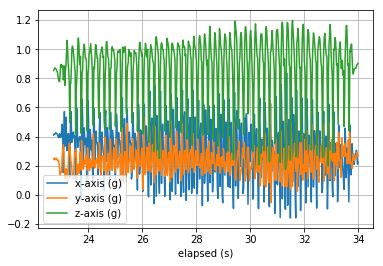

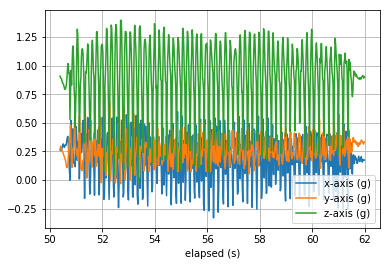

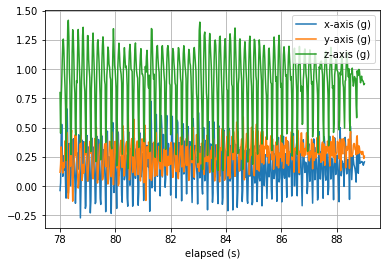

In [36]:
plot(accel_df_array[0], 2, [3, 4, 5], figsize=SMALLFIG)
plot(accel_df_array[1], 2, [3, 4, 5], figsize=SMALLFIG)
plot(accel_df_array[2], 2, [3, 4, 5], figsize=SMALLFIG)

We filter out the constant offset in each of the axes. 

In [39]:
def hpf(dataframe):
    """
    High pass filter.
    
    # [TODO]
    
    Parameters
    ----------
    dataframe (DataFrame())
    """
    return dataframe


accel_df_array_hpf = list(map(lambda x: x, accel_df_array))

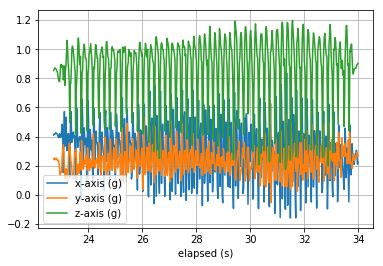

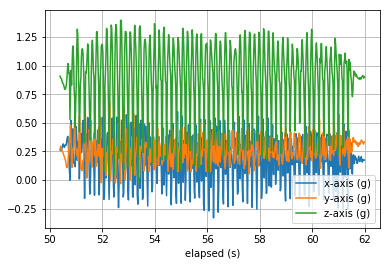

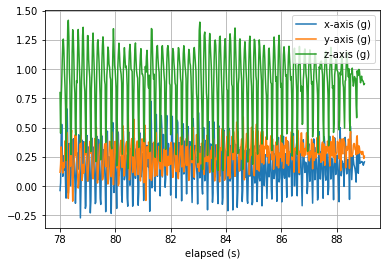

In [42]:
plot(accel_df_array_hpf[0], 2, [3, 4, 5], figsize=SMALLFIG)
plot(accel_df_array_hpf[1], 2, [3, 4, 5], figsize=SMALLFIG)
plot(accel_df_array_hpf[2], 2, [3, 4, 5], figsize=SMALLFIG) 

Obtain possible statistics: 
 - mean
 - standard deviation
 - minimum value
 - lower quartile
 - middle quartile
 - upper quartile
 - maximum value
 
We only extract the values of the x-, y- and z- axes. We don't include `elapsed` as there is no way to automatically truncate date to obtain the nice signal as with manual truncation at this moment. 

In [49]:
# Obtain the statistics, taking care to only focus on the desired columns
print(accel_df_array_hpf[0].iloc[:, [3, 4, 5]].describe(), end='\n\n')
print(accel_df_array_hpf[1].iloc[:, [3, 4, 5]].describe(), end='\n\n')
print(accel_df_array_hpf[2].iloc[:, [3, 4, 5]].describe(), end='\n\n')

       x-axis (g)  y-axis (g)  z-axis (g)
count  568.000000  568.000000  568.000000
mean     0.312107    0.245850    0.877359
std      0.193497    0.095614    0.216152
min     -0.158000   -0.053000    0.176000
25%      0.183000    0.179750    0.818250
50%      0.327000    0.238500    0.939000
75%      0.438250    0.300000    1.019500
max      0.837000    0.647000    1.199000

       x-axis (g)  y-axis (g)  z-axis (g)
count  584.000000  584.000000  584.000000
mean     0.191223    0.280529    0.897634
std      0.198258    0.122184    0.307031
min     -0.331000   -0.033000   -0.027000
25%      0.065500    0.200000    0.771000
50%      0.207500    0.275500    0.942500
75%      0.340000    0.356000    1.132250
max      0.599000    0.768000    1.396000

       x-axis (g)  y-axis (g)  z-axis (g)
count  554.000000  554.000000  554.000000
mean     0.186114    0.276092    0.899717
std      0.180280    0.124564    0.285844
min     -0.272000   -0.129000    0.121000
25%      0.071250    0.191000   